# Udacity Machine Learning Engineer - Capstone Project

*Marco Xu, November 15th 2020*

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Data Exploration

In [4]:
df.shape

(3000, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
df.describe()

,id,budget,popularity,runtime,revenue
count,"3,000.00","3,000.00","3,000.00","2,998.00","3,000.00"
mean,"1,500.50","22,531,334.11",8.46,107.86,"66,725,851.89"
std,866.17,"37,026,086.41",12.10,22.09,"137,532,326.34"
min,1.00,0.00,0.00,0.00,1.00
25%,750.75,0.00,4.02,94.00,"2,379,808.25"
50%,"1,500.50","8,000,000.00",7.37,104.00,"16,807,068.00"
75%,"2,250.25","29,000,000.00",10.89,118.00,"68,919,203.50"
max,"3,000.00","380,000,000.00",294.34,338.00,"1,519,557,910.00"


In [7]:
import datetime
#Fixes dates which are in 20xx

def fix_date(x):
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year
    
df['release_date'] = df['release_date'].apply(lambda x: fix_date(x))
df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
min(df.release_date)

Timestamp('1921-01-21 00:00:00')

In [9]:
max(df.release_date)

Timestamp('2017-07-20 00:00:00')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf52bfe048>]],
      dtype=object)

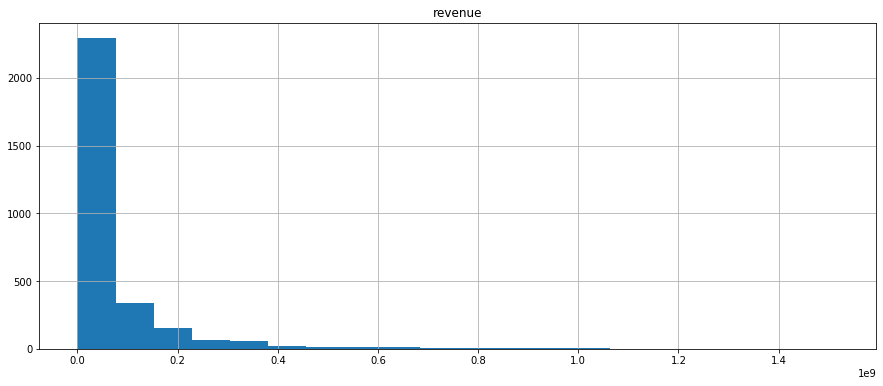

In [10]:
df.hist(column='revenue', bins= 20,figsize=(15,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf5218b668>]],
      dtype=object)

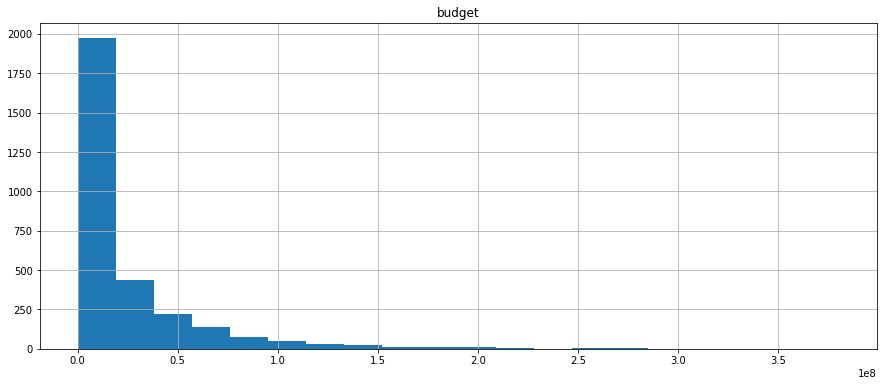

In [11]:
df.hist(column='budget', bins= 20,figsize=(15,6))

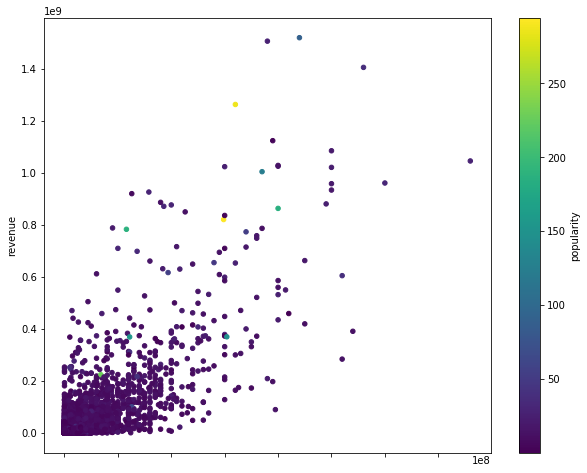

In [12]:
df.plot.scatter(x='budget',y='revenue',c='popularity',colormap='viridis',figsize=(10,8))

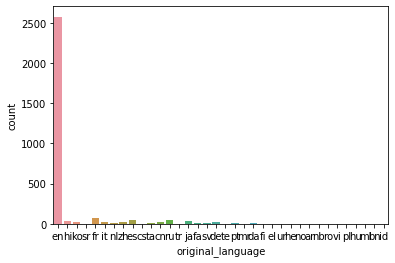

In [13]:
#sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="original_language", data=df)

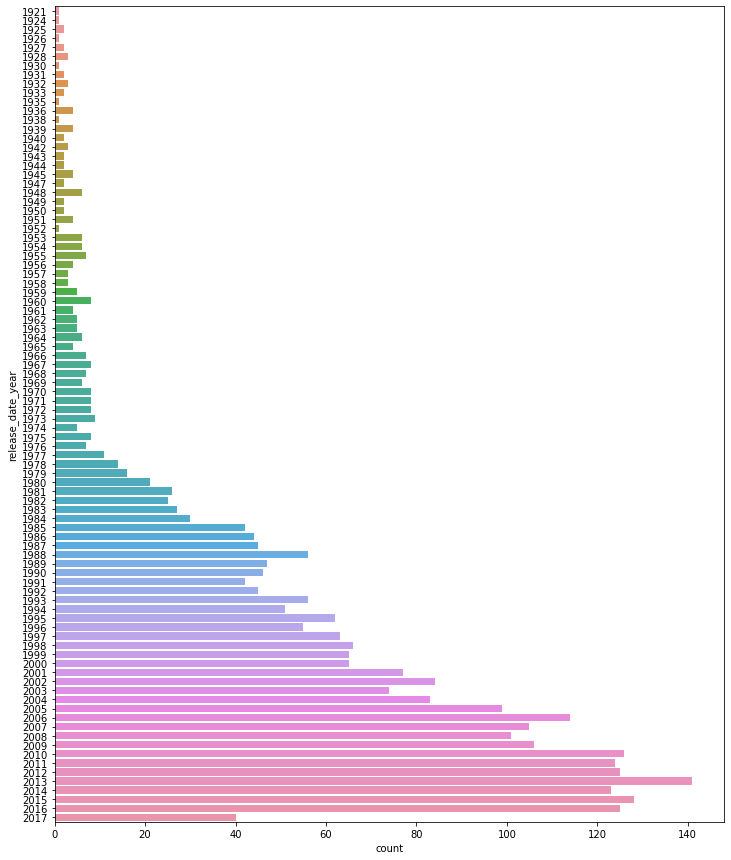

In [14]:
df['release_date_year'] = pd.DatetimeIndex(df['release_date']).year
plt.figure(figsize=(12,15))
sns.countplot(y="release_date_year", data=df)

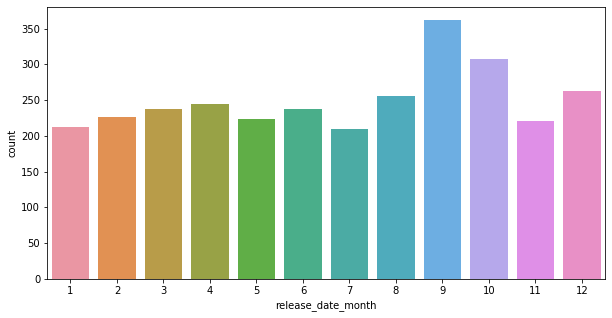

In [15]:
df['release_date_month'] = pd.DatetimeIndex(df['release_date']).month
plt.figure(figsize=(10,5))
sns.countplot(x="release_date_month", data=df)

## Feature Engineering

In [16]:
import boto3
import sagemaker
from sagemaker import get_execution_role
from sagemaker.sklearn.processing import SKLearnProcessor

region = boto3.session.Session().region_name

role = get_execution_role()
sklearn_processor = SKLearnProcessor(framework_version='0.20.0',
                                     role=role,
                                     instance_type='ml.m5.xlarge',
                                     instance_count=1)

In [17]:
%%writefile preprocessing.py

import pandas as pd
import numpy as np
import re
from ast import literal_eval
from sklearn.preprocessing import MultiLabelBinarizer

def string_to_list(text,key):
    pattern = "\{(.*?)\}"
    substring = re.findall(pattern, str(text))
    # convert substring to list of dictionaries
    genre_list = [literal_eval('{'+i+'}')[key] for i in substring]
    
    return genre_list


def list_to_columns(df,column):
    mlb = MultiLabelBinarizer()
    df_encoded = pd.DataFrame(mlb.fit_transform(df[column]),columns=mlb.classes_, index=df.index)
    df = df.join(df_encoded)
    return df

def cast_in_top_actors(cast,top_actors_list):
    if not list(set(cast) & set(top_actors_list)): #check if intersection is empty
        return 0
    else:
        return 1

if __name__=='__main__':

    df['genres_cleaned'] = df['genres'].apply(lambda x: string_to_list(x,'name'))

    df = list_to_columns(df,"genres_cleaned")
    df['part_of_franchise'] = np.where(df['belongs_to_collection'].isnull(), 0, 1)
    ## get top actors
    df_top_movies = df.sort_values(by=['revenue'], ascending=False).head(100)
    all_actors = df_top_movies['cast'].apply(lambda x: string_to_list(x,'name')).to_list()
    top_actors = [actor[:2] for actor in all_actors]

    top_actors_distinct = []
    for sublist in top_actors:
        for actor in sublist:
            if actor not in top_actors_distinct:
                top_actors_distinct.append(actor)

    top_actors_distinct
    ## note: we save this list, since in test data, we don't have revenue information
    top_actors_distinct_df = pd.DataFrame(top_actors_distinct,columns=['actor'])
    top_actors_distinct_df.to_csv('top_actors_distinct_df.csv', index=False)
    top_actors_distinct = pd.read_csv('top_actors_distinct_df.csv').actor.to_list()

    cast_list = df['cast'].apply(lambda x: string_to_list(x,'name')).to_list()
    main_cast = [actor[:3] for actor in cast_list]
    df['main_cast'] = main_cast

    # cast in top_actors included?



    df['top_actor_included'] = df['main_cast'].apply(lambda x: cast_in_top_actors(x,top_actors_distinct))

    ## how much did main cast already gross?
    df_cast_gross = df[['revenue','main_cast']]
    df_cast_gross = list_to_columns(df_cast_gross,"main_cast")
    main_cast_list = df_cast_gross.columns.tolist()[2:]

    actor_revenue = {}
    for actor in main_cast_list:
        df_actor_revenue = df_cast_gross[['revenue',actor]]
        df_actor_revenue = df_actor_revenue.groupby([actor]).sum().reset_index()
        revenue = df_actor_revenue[df_actor_revenue[actor]==1].reset_index().revenue[0]
        actor_revenue[actor] = revenue

    actor_revenue_df = pd.DataFrame.from_dict(actor_revenue, orient='index',columns=['revenue']).reset_index().rename(columns={'index': 'actor'})
    actor_revenue_df.head()  

    ## note: we save this df, since in test data, we don't have revenue information
    actor_revenue_df.to_csv('actor_revenue_df.csv', index=False)
    actor_revenue_df = pd.read_csv('actor_revenue_df.csv')

    actor_revenue_group = {}
    i = 1
    for cast in df.main_cast.tolist():
        sum_revenue = actor_revenue_df[actor_revenue_df.actor.isin(cast)].revenue.sum()
        actor_revenue_group[i] = sum_revenue
        i += 1

    actor_revenue_group_df = pd.DataFrame.from_dict(actor_revenue_group, orient='index',columns=['revenue']).reset_index().rename(columns={'index': 'id','revenue': 'revenue_cast'})
    actor_revenue_group_df = actor_revenue_group_df[['revenue_cast']]

    # how much did each franchise earn?
    franchise_list = df['belongs_to_collection'].apply(lambda x: string_to_list(x,'name')).to_list()
    franchise = [np.nan if not franchise else franchise[0] for franchise in franchise_list]
    df['franchise'] = franchise

    df_franchise_revenue = df.groupby(["franchise"]).sum()[['revenue']].reset_index()
    df_franchise_revenue = df_franchise_revenue.rename(columns={'revenue': 'franchise_revenue'})

    ## note: we save this df, since in test data, we don't have revenue information
    df_franchise_revenue.to_csv('df_franchise_revenue.csv', index=False)
    df_franchise_revenue = pd.read_csv('df_franchise_revenue.csv')

    df = df.merge(df_franchise_revenue, on = 'franchise', how = 'left')
    df['franchise_revenue'] = df['franchise_revenue'].fillna(0)

Overwriting preprocessing.py


### Encode variables with several values like genres

In [18]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_month
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2


In [19]:
import re
from ast import literal_eval
def string_to_list(text,key):
    pattern = "\{(.*?)\}"
    substring = re.findall(pattern, str(text))
    # convert substring to list of dictionaries
    genre_list = [literal_eval('{'+i+'}')[key] for i in substring]
    
    return genre_list

In [20]:
df['genres_cleaned'] = df['genres'].apply(lambda x: string_to_list(x,'name'))
#df['spoken_languages_cleaned'] = df['spoken_languages'].apply(lambda x: string_to_list(x,'name'))
#df['production_countries_cleaned'] = df['production_countries'].apply(lambda x: string_to_list(x,'name'))
#df['production_companies_cleaned'] = df['production_companies'].apply(lambda x: string_to_list(x,'name'))
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_month,genres_cleaned
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,[Comedy]
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,"[Comedy, Drama, Family, Romance]"
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,[Drama]
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,"[Thriller, Drama]"
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,"[Action, Thriller]"


In [21]:
from sklearn.preprocessing import MultiLabelBinarizer
def list_to_columns(df,column):
    mlb = MultiLabelBinarizer()
    df_encoded = pd.DataFrame(mlb.fit_transform(df[column]),columns=mlb.classes_, index=df.index)
    df = df.join(df_encoded)
    return df

In [22]:
df = list_to_columns(df,"genres_cleaned")
#df = list_to_columns(df,"spoken_languages_cleaned")
#df = list_to_columns(df,"production_countries_cleaned")
#df = list_to_columns(df,"production_companies_cleaned")
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_month,genres_cleaned,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,[Comedy],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,"[Comedy, Drama, Family, Romance]",0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,"[Thriller, Drama]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,"[Action, Thriller]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
## check if film is part of franchise
df['part_of_franchise'] = np.where(df['belongs_to_collection'].isnull(), 0, 1)

### Extract Information from cast

In [24]:
string_to_list(df.cast[2],'name')[:2]

['Miles Teller', 'J.K. Simmons']

In [25]:
## get top actors
df_top_movies = df.sort_values(by=['revenue'], ascending=False).head(100)
all_actors = df_top_movies['cast'].apply(lambda x: string_to_list(x,'name')).to_list()
top_actors = [actor[:2] for actor in all_actors]

top_actors_distinct = []
for sublist in top_actors:
    for actor in sublist:
        if actor not in top_actors_distinct:
            top_actors_distinct.append(actor)
            
top_actors_distinct
## note: we save this list, since in test data, we don't have revenue information
top_actors_distinct_df = pd.DataFrame(top_actors_distinct,columns=['actor'])
top_actors_distinct_df.to_csv('top_actors_distinct_df.csv', index=False)
top_actors_distinct = pd.read_csv('top_actors_distinct_df.csv').actor.to_list()

In [26]:
# get main_cast
cast_list = df['cast'].apply(lambda x: string_to_list(x,'name')).to_list()
main_cast = [actor[:3] for actor in cast_list]
df['main_cast'] = main_cast
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_month,genres_cleaned,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,part_of_franchise,main_cast
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,[Comedy],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Rob Corddry, Craig Robinson, Clark Duke]"
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,"[Comedy, Drama, Family, Romance]",0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,"[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]"
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Miles Teller, J.K. Simmons, Melissa Benoist]"
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,"[Thriller, Drama]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ..."
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,"[Action, Thriller]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon]"


In [27]:
# cast in top_actors included?
def cast_in_top_actors(cast,top_actors_list):
    if not list(set(cast) & set(top_actors_list)): #check if intersection is empty
        return 0
    else:
        return 1
    
    
df['top_actor_included'] = df['main_cast'].apply(lambda x: cast_in_top_actors(x,top_actors_distinct))

In [28]:
## how much did main cast already gross?
df_cast_gross = df[['revenue','main_cast']]
df_cast_gross = list_to_columns(df_cast_gross,"main_cast")
main_cast_list = df_cast_gross.columns.tolist()[2:]

actor_revenue = {}
for actor in main_cast_list:
    df_actor_revenue = df_cast_gross[['revenue',actor]]
    df_actor_revenue = df_actor_revenue.groupby([actor]).sum().reset_index()
    revenue = df_actor_revenue[df_actor_revenue[actor]==1].reset_index().revenue[0]
    actor_revenue[actor] = revenue
    
actor_revenue_df = pd.DataFrame.from_dict(actor_revenue, orient='index',columns=['revenue']).reset_index().rename(columns={'index': 'actor'})
actor_revenue_df.head()  

,actor,revenue
0,50 Cent,75302752
1,A.J. Cook,90426405
2,AJ Bowen,259126
3,Aake Kalliala,532269
4,Aaliyah,91036760


In [29]:
## note: we save this df, since in test data, we don't have revenue information
actor_revenue_df.to_csv('actor_revenue_df.csv', index=False)
actor_revenue_df = pd.read_csv('actor_revenue_df.csv')

In [30]:
df.main_cast.tolist()

[['Rob Corddry', 'Craig Robinson', 'Clark Duke'],
 ['Anne Hathaway', 'Julie Andrews', 'H√©ctor Elizondo'],
 ['Miles Teller', 'J.K. Simmons', 'Melissa Benoist'],
 ['Vidya Balan', 'Nawazuddin Siddiqui', 'Parambrata Chatterjee'],
 ['Kim Kang-woo', 'Jo Jae-hyeon', 'Park Si-yeon'],
 ['Scott Grimes', 'Tom Bosley', 'Rickie Lee Jones'],
 ['Jeffrey Dean Morgan', 'Natasha Calis', 'Madison Davenport'],
 ['Samir Khader', 'Josh Rushing', 'George W. Bush'],
 ['Tim Curry', 'Kevin Bishop', 'Jennifer Saunders'],
 ['Bob Balaban', 'Christopher Guest', 'John Michael Higgins'],
 ['Sylvester Stallone', 'Talia Shire', 'Burt Young'],
 ['Robert Carradine', 'Curtis Armstrong', 'Larry B. Scott'],
 ['Kevin Spacey', 'Annette Bening', 'Thora Birch'],
 ['John Travolta', 'Uma Thurman', 'Vince Vaughn'],
 ['Tom Cruise', 'Colin Farrell', 'Samantha Morton'],
 ['Nikola Rakoƒçeviƒá', 'Viktor Saviƒá', 'Nata≈°a Tapu≈°koviƒá'],
 ['Rachel McAdams', 'Cillian Murphy', 'Brian Cox'],
 ['Ralph Fiennes', 'Felicity Jones', 'Joanna Sc

In [31]:
actor_revenue_group = {}
i = 1
for cast in df.main_cast.tolist():
    sum_revenue = actor_revenue_df[actor_revenue_df.actor.isin(cast)].revenue.sum()
    actor_revenue_group[i] = sum_revenue
    i += 1
    
actor_revenue_group_df = pd.DataFrame.from_dict(actor_revenue_group, orient='index',columns=['revenue']).reset_index().rename(columns={'index': 'id','revenue': 'revenue_cast'})
actor_revenue_group_df = actor_revenue_group_df[['revenue_cast']]
actor_revenue_group_df

,revenue_cast
0,59005481
1,2692181207
2,431554469
3,53249077
4,11774250
...,...
2995,61533112
2996,541770
2997,2604909734
2998,1914885296


In [32]:
df = df.join(actor_revenue_group_df)
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_month,genres_cleaned,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,part_of_franchise,main_cast,top_actor_included,revenue_cast
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,[Comedy],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Rob Corddry, Craig Robinson, Clark Duke]",0,59005481
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,"[Comedy, Drama, Family, Romance]",0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,"[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",1,2692181207
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Miles Teller, J.K. Simmons, Melissa Benoist]",0,431554469
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,"[Thriller, Drama]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",0,53249077
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,"[Action, Thriller]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon]"

### Extract Information from franchise

In [33]:
t = df.sort_values(by=['revenue'], ascending=False).reset_index(drop=True)
string_to_list(t.belongs_to_collection[0],'name')

['The Avengers Collection']

In [34]:
# how much did each franchise earn?
franchise_list = df['belongs_to_collection'].apply(lambda x: string_to_list(x,'name')).to_list()
franchise = [np.nan if not franchise else franchise[0] for franchise in franchise_list]
df['franchise'] = franchise

In [35]:
df_franchise_revenue = df.groupby(["franchise"]).sum()[['revenue']].reset_index()
df_franchise_revenue = df_franchise_revenue.rename(columns={'revenue': 'franchise_revenue'})

## note: we save this df, since in test data, we don't have revenue information
df_franchise_revenue.to_csv('df_franchise_revenue.csv', index=False)
df_franchise_revenue = pd.read_csv('df_franchise_revenue.csv')

In [36]:
df = df.merge(df_franchise_revenue, on = 'franchise', how = 'left')
df['franchise_revenue'] = df['franchise_revenue'].fillna(0)
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_month,genres_cleaned,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,part_of_franchise,main_cast,top_actor_included,revenue_cast,franchise,franchise_revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,[Comedy],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Rob Corddry, Craig Robinson, Clark Duke]",0,59005481,Hot Tub Time Machine Collection,"12,314,651.00"
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,"[Comedy, Drama, Family, Romance]",0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,"[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",1,2692181207,The Princess Diaries Collection,"260,484,588.00"
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Miles Teller, J.K. Simmons, Melissa Benoist]",0,431554469,NaN,0.00
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,"[Thriller, Drama]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",0,53249077,NaN,0.00
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b925141

### Production Companies

### NLP

In [37]:
df_overview = df.overview.to_list()

In [38]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
def review_to_words(review):
    text = re.sub(r"[^a-zA-Z0-9]", " ", str(review).lower()) # Convert to lower case
    words = text.split() # Split string into words
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    
    return words

In [40]:
df_overview_words = [review_to_words(review) for review in df_overview]

In [41]:
len(df_overview_words)

3000

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=100, preprocessor=lambda x: x, tokenizer=lambda x: x)
features_train = vectorizer.fit_transform(df_overview_words).toarray()
features_train = pd.DataFrame(features_train,columns=['nlp_'+word for word in vectorizer.get_feature_names()])

## Modeling

In [43]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_month,genres_cleaned,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,part_of_franchise,main_cast,top_actor_included,revenue_cast,franchise,franchise_revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.58,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,[Comedy],0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[Rob Corddry, Craig Robinson, Clark Duke]",0,59005481,Hot Tub Time Machine Collection,"12,314,651.00"
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.25,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,"[Comedy, Drama, Family, Romance]",0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,"[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",1,2692181207,The Princess Diaries Collection,"260,484,588.00"
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.30,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,[Drama],0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[Miles Teller, J.K. Simmons, Melissa Benoist]",0,431554469,NaN,0.00
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.17,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,"[Thriller, Drama]",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",0,53249077,NaN,0.00
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.15,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.00,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b925141

In [44]:
'''
df_small = df.drop(columns=['id', 'belongs_to_collection','genres','homepage','imdb_id','original_title','overview','popularity',
                    'poster_path','production_companies','production_countries','release_date','spoken_languages','status',
                    'tagline','title','Keywords','cast','crew','genres_cleaned','spoken_languages_cleaned','production_countries_cleaned',
                            'main_cast','franchise','production_companies_cleaned'])
'''
df_small = df.drop(columns=['id', 'belongs_to_collection','genres','homepage','imdb_id','original_title','overview','popularity',
                    'poster_path','production_companies','production_countries','release_date','spoken_languages','status',
                    'tagline','title','Keywords','cast','crew','genres_cleaned',
                            'main_cast','franchise','original_language'])

df_small.dropna(inplace=True) #remove rows including na
df_small = df_small.drop(df_small[df_small.budget <= 0].index) #drop rows with zero budget

np.random.seed(23)
df_small = df_small.sample(frac = 1) 

X = df_small.drop(columns=['revenue'])
y = df_small[['revenue']]

### Feature Selection

In [45]:
print(X.shape)
X.head()

(2187, 28)


,budget,runtime,release_date_year,release_date_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,part_of_franchise,top_actor_included,revenue_cast,franchise_revenue
140,14320000,176.00,1968,7,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1106974490,0.00
1205,6000000,99.00,1981,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,867423879,"92,522,065.00"
2295,400000,80.00,2008,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15765,0.00
2478,24000000,93.00,2009,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6258675094,0.00
2727,500000,95.00,2011,9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,635900,0.00


In [46]:
X_train = X[:1500]
y_train = y[:1500]
X_val = X[1500:1800]
y_val = y[1500:1800]
X_test = X[1800:]
y_test = y[1800:]

In [47]:
len(X_train)+len(X_val)+len(X_test) == len(X)

True

In [48]:
X_test

,budget,runtime,release_date_year,release_date_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,part_of_franchise,top_actor_included,revenue_cast,franchise_revenue
2363,45000000,113.00,1996,8,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2392704971,0.00
1219,5000000,106.00,2008,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1215866712,0.00
1094,85000000,136.00,2006,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2582648389,0.00
309,26000000,97.00,2003,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,650742574,0.00
761,15000000,95.00,2014,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,260114713,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,1243000,106.00,1948,12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,50060757,0.00
2734,40000000,104.00,2011,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1572908947,0.00
1475,12000000,91.00,1992,8,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,325232320,0.00
1032,5000000,106.00,2004,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,160701823,0.00


In [49]:
X_train.head()

,budget,runtime,release_date_year,release_date_month,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,part_of_franchise,top_actor_included,revenue_cast,franchise_revenue
140,14320000,176.00,1968,7,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1106974490,0.00
1205,6000000,99.00,1981,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,867423879,"92,522,065.00"
2295,400000,80.00,2008,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15765,0.00
2478,24000000,93.00,2009,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6258675094,0.00
2727,500000,95.00,2011,9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,635900,0.00


In [50]:
pd.concat([y_test, X_test], axis=1).to_csv('linear_regression/test.csv', header=False, index=False)
pd.concat([y_train, X_train], axis=1).to_csv('linear_regression/train.csv', header=False, index=False)
pd.concat([y_val, X_val], axis=1).to_csv('linear_regression/val.csv', header=False, index=False)

In [51]:
import sagemaker

session = sagemaker.Session() # Store the current SageMaker session

# S3 prefix (which folder will we use)
prefix = 'box_office_prediction_linear_regression'


test_location = session.upload_data('linear_regression/test.csv', key_prefix=prefix)
train_location = session.upload_data('linear_regression/train.csv', key_prefix=prefix)
val_location = session.upload_data('linear_regression/val.csv', key_prefix=prefix)

In [52]:
from sagemaker import get_execution_role
role = get_execution_role()

In [ ]:
## xgboost
from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(session.boto_region_name, 'xgboost')

In [ ]:
linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                       sagemaker_session=session)

In [ ]:
## xgboost
linear.set_hyperparameters(max_depth=5,
                        eta=0.2,
                        gamma=4,
                        min_child_weight=6,
                        subsample=0.8,
                        silent=0,
                        objective='reg:linear',
                        early_stopping_rounds=10,
                        num_round=50)

In [54]:
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='text/csv')
s3_input_val = sagemaker.s3_input(s3_data=val_location, content_type='text/csv')

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


In [61]:
train_location

's3://sagemaker-eu-central-1-724293319711/box_office_prediction_linear_regression/train.csv'

In [62]:
pd.read_csv(train_location, header=None, names=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,14000000,14320000,176.00,1968,7,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1106974490,0.00
1,50244700,6000000,99.00,1981,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,867423879,"92,522,065.00"
2,5255,400000,80.00,2008,3,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15765,0.00
3,68729358,24000000,93.00,2009,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,6258675094,0.00
4,171760,500000,95.00,2011,9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,635900,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,135680000,20000000,72.00,2003,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1284261839,"135,680,000.00"
1496,8178569,20000000,93.00,1982,11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,132898348,0.00
1497,16656125,14000000,112.00,1980,6,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,638665881,0.00
1498,300000,2000000,90.00,2006,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900000,0.00


In [64]:
from sagemaker.xgboost.estimator import XGBoost

hyperparameters = {
        "max_depth":5,
        "eta":0.2,
        "gamma":4,
        "min_child_weight":6,
        "subsample":0.7,
        "silent":0,
        "objective":"reg:linear",
        "num_round":50
}

linear = XGBoost(
    entry_point="train_xgboost.py",
    hyperparameters=hyperparameters,
    role=role,
    train_instance_count=1,
    train_instance_type="ml.m5.2xlarge",
    framework_version="1.0-1"
)

linear.fit({'train': s3_input_train, 'validation': s3_input_val})

2020-11-06 19:06:38 Starting - Starting the training job...
2020-11-06 19:06:40 Starting - Launching requested ML instances......
2020-11-06 19:08:02 Starting - Preparing the instances for training......
2020-11-06 19:08:44 Downloading - Downloading input data...
2020-11-06 19:09:37 Training - Training image download completed. Training in progress.
2020-11-06 19:09:37 Uploading - Uploading generated training model.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Invoking user training script.
INFO:sagemaker-containers:Module train_xgboost does not provide a setup.py. 
Generating setup.py
INFO:sagemaker-containers:Generating setup.cfg
INFO:sagemaker-containers:Generating MANIFEST.in
INFO:sagemaker-containers:Installing module with the following command:
/miniconda3/bin/python -m pip install . 
Processing /opt/ml/code
  Created wheel for tra

UnexpectedStatusException: Error for Training job sagemaker-xgboost-2020-11-06-19-06-38-225: Failed. Reason: AlgorithmError: ExecuteUserScriptError:
Command "/miniconda3/bin/python -m train_xgboost --eta 0.2 --gamma 4 --max_depth 5 --min_child_weight 6 --num_round 50 --objective reg:linear --silent 0 --subsample 0.7"

In [58]:
from sagemaker.session import s3_input
from sagemaker.xgboost.estimator import XGBoost
import time
job_name = 'DEMO-xgboost-inference-script-mode-' + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())
print("Training job", job_name)

hyperparameters = {
        "max_depth":"5",
        "eta":"0.2",
        "gamma":"4",
        "min_child_weight":"6",
        "subsample":"0.7",
        "silent":"0",
        "objective":"reg:squarederror",
        "num_round":"50",
}

instance_type = "ml.c5.xlarge"

xgb_script_mode_estimator = XGBoost(
    entry_point="train_xgboost.py",
    hyperparameters=hyperparameters,
    role=role, 
    train_instance_count=1,
    train_instance_type=instance_type,
    framework_version="1.0-1",
    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix)
)

xgb_script_mode_estimator.fit({'train': s3_input_train, 'validation': s3_input_val})

Training job DEMO-xgboost-inference-script-mode-2020-11-06-18-38-44
2020-11-06 18:38:45 Starting - Starting the training job...
2020-11-06 18:38:48 Starting - Launching requested ML instances......
2020-11-06 18:39:51 Starting - Preparing the instances for training...
2020-11-06 18:40:28 Downloading - Downloading input data...
2020-11-06 18:41:14 Training - Training image download completed. Training in progress.
2020-11-06 18:41:14 Uploading - Uploading generated training model.INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Invoking user training script.
INFO:sagemaker-containers:Module train_xgboost does not provide a setup.py. 
Generating setup.py
INFO:sagemaker-containers:Generating setup.cfg
INFO:sagemaker-containers:Generating MANIFEST.in
INFO:sagemaker-containers:Installing module with the following command:
/miniconda3/bin/python 


2020-11-06 18:41:17 Failed - Training job failed


UnexpectedStatusException: Error for Training job sagemaker-xgboost-2020-11-06-18-38-45-737: Failed. Reason: AlgorithmError: ExecuteUserScriptError:
Command "/miniconda3/bin/python -m train_xgboost --eta 0.2 --gamma 4 --max_depth 5 --min_child_weight 6 --num_round 50 --objective reg:squarederror --silent 0 --subsample 0.7"

In [ ]:
linear.fit({'train': s3_input_train, 'validation': s3_input_val})

In [ ]:
predictor = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

### Prediction results

In [ ]:
import os
data_dir = 'linear_regression'
test_data = pd.read_csv(os.path.join(data_dir, "test.csv"), header=None, names=None)

y_test = np.array(test_data.iloc[:,0])
X_test = np.array(test_data.iloc[:,1:])

In [ ]:
# Set up
from sagemaker.predictor import csv_serializer, json_deserializer
predictor.content_type = 'text/csv'
predictor.serializer = csv_serializer
predictor.deserializer = json_deserializer

In [ ]:
result = predictor.predict(X_test[0])
print(result)

In [ ]:
## xgboost
predictions = []
for array in X_test:
    result = predictor.predict(array)
    predictions.append(result)
predictions = np.array(predictions)

predictions[:5]

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

In [ ]:
from sklearn.metrics import mean_squared_log_error
predictions_no_neg = np.where(predictions < 0, 0, predictions)
np.sqrt(mean_squared_log_error( y_test, predictions_no_neg ))

In [ ]:
len(y_test) == len(predictions)

## Sending Data to Endpoint

In [ ]:
X_test[0]

In [ ]:
predictor.predict(X_test[0])

In [ ]:
X_test

In [ ]:
string_ = "{'budget':300000000,'main_cast': [['Leonardo DiCaprio','Tom Hardy']],'runtime': 115, 'release_date_year': 2021, 'release_date_month': 12, 'genres': [['Action','Crime']], 'franchise': 'The Avengers Collection'}"


In [ ]:
import ast
movie_dict = ast.literal_eval(string_)

In [ ]:
movie_dict

In [ ]:
df_test = pd.DataFrame.from_dict(movie_dict)
df_test

### Prepare Data

In [ ]:
actor_revenue_df

In [ ]:
actor_revenue_group = {}
i = 1
for cast in df_test.main_cast.tolist():
    sum_revenue = actor_revenue_df[actor_revenue_df.actor.isin(cast)].revenue.sum()
    actor_revenue_group[i] = sum_revenue
    i += 1
    
actor_revenue_group_df = pd.DataFrame.from_dict(actor_revenue_group, orient='index',columns=['revenue']).reset_index().rename(columns={'index': 'id','revenue': 'revenue_cast'})
actor_revenue_group_df = actor_revenue_group_df[['revenue_cast']]
df_test = df_test.join(actor_revenue_group_df)
df_test

In [ ]:
top_actors_distinct

In [ ]:
# cast in top_actors included?
def cast_in_top_actors(cast,top_actors_list):
    if not list(set(cast) & set(top_actors_list)): #check if intersection is empty
        return 0
    else:
        return 1
    
    
df_test['top_actor_included'] = df_test['main_cast'].apply(lambda x: cast_in_top_actors(x,top_actors_distinct))
df_test

In [ ]:
df_test['part_of_franchise'] = np.where(df_test['franchise'].isnull(), 0, 1)
df_test

In [ ]:
df_franchise_revenue

In [ ]:
df_test = df_test.merge(df_franchise_revenue, on = 'franchise', how = 'left')
df_test['franchise_revenue'] = df_test['franchise_revenue'].fillna(0)
df_test.head()

In [ ]:
df_test = list_to_columns(df_test,"genres")
df_test

In [ ]:
X.head()

In [ ]:
X.head().to_csv('X_head.csv', index=False)
X = pd.read_csv('X_head.csv')

In [ ]:
X

In [ ]:
## select columns from training set. if column doesn't exist, replace with 0
def select_replace_columns(df,X):
    df_new = pd.DataFrame()
    for column in X.columns.tolist():
        if column in df.columns.tolist():
            df_new = pd.concat([df_new,df[[column]]],axis=1)
        else:
            df_new[column] = 0
            
    return df_new

df_test = select_replace_columns(df_test,X)

In [ ]:
df_test_array = np.array(df_test)
df_test_array 

In [ ]:
predictor.predict(df_test_array)

In [ ]:
predictor.endpoint

In [ ]:
import boto3
runtime = boto3.Session().client('sagemaker-runtime')

In [ ]:
response = runtime.invoke_endpoint(EndpointName = predictor.endpoint,   # The name of the endpoint we created
                                       ContentType = 'text/csv',                     # The data format that is expected
                                       Body = ','.join([str(val) for val in df_test.iloc[0]]).encode('utf-8') )

In [ ]:
print(response)

In [ ]:
response = response['Body'].read().decode('utf-8')
print(response)

In [ ]:
%%writefile predict.py
import boto3

import pandas as pd
import numpy as np
import ast

def select_replace_columns(df,X):
    df_new = pd.DataFrame()
    for column in X.columns.tolist():
        if column in df.columns.tolist():
            df_new = pd.concat([df_new,df[[column]]],axis=1)
        else:
            df_new[column] = 0

    return df_new
        

def cast_in_top_actors(cast,top_actors_list):
    if not list(set(cast) & set(top_actors_list)): #check if intersection is empty
        return 0
    else:
        return 1

def predict_fn(input_data, model):
    """
    SageMaker XGBoost model server invokes `predict_fn` on the return value of `input_fn`.

    Return a two-dimensional NumPy array where the first columns are predictions
    and the remaining columns are the feature contributions (SHAP values) for that prediction.
    """
    
    actor_revenue_df = pd.read_csv('actor_revenue_df.csv')
    top_actors_distinct = pd.read_csv('top_actors_distinct_df.csv').actor.to_list()
    df_franchise_revenue = pd.read_csv('df_franchise_revenue.csv')
    X = pd.read_csv('X_head.csv')
    
    movie_dict = ast.literal_eval(input_data)
    df_test = pd.DataFrame.from_dict(movie_dict)
    
    actor_revenue_group = {}
    i = 1
    for cast in df_test.main_cast.tolist():
        sum_revenue = actor_revenue_df[actor_revenue_df.actor.isin(cast)].revenue.sum()
        actor_revenue_group[i] = sum_revenue
        i += 1
        
    actor_revenue_group_df = pd.DataFrame.from_dict(actor_revenue_group, orient='index',columns=['revenue']).reset_index().rename(columns={'index': 'id','revenue': 'revenue_cast'})
    actor_revenue_group_df = actor_revenue_group_df[['revenue_cast']]
    df_test = df_test.join(actor_revenue_group_df)

    df_test['top_actor_included'] = df_test['main_cast'].apply(lambda x: cast_in_top_actors(x,top_actors_distinct))

    df_test['part_of_franchise'] = np.where(df_test['franchise'].isnull(), 0, 1)
    
    df_test = df_test.merge(df_franchise_revenue, on = 'franchise', how = 'left')
    df_test['franchise_revenue'] = df_test['franchise_revenue'].fillna(0)
    df_test = list_to_columns(df_test,"genres")
    
    df_test = select_replace_columns(df_test,X)
    
    df_test_array = np.array(df_test)
    
    
    prediction = model.predict(df_test_array)

    return prediction


In [ ]:
%%writefile predict.py
import json
import os
import pickle as pkl

import numpy as np

import sagemaker_xgboost_container.encoder as xgb_encoders



def model_fn(model_dir):
    with open(os.path.join(model_dir, "xgboost-model"), "rb") as f:
        booster = pkl.load(f)
    return booster

from io import BytesIO
import numpy as np
import xgboost as xgb


def predict_fn(input_data, model):
    """
    SageMaker XGBoost model server invokes `predict_fn` on the return value of `input_fn`.

    Return a two-dimensional NumPy array where the first columns are predictions
    and the remaining columns are the feature contributions (SHAP values) for that prediction.
    """
    prediction = model.predict(input_data)
    feature_contribs = model.predict(input_data, pred_contribs=True)
    output = np.hstack((prediction[:, np.newaxis], feature_contribs))
    return output



In [ ]:
linear

In [ ]:
from sagemaker.xgboost.model import XGBoostModel

model_data = linear.model_data
model_data

In [ ]:
xgb_inference_model = XGBoostModel(
    model_data=model_data,
    role=role,
    entry_point="predict.py",
    framework_version="1.0-1",
)

In [ ]:
#predictor = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

predictor = xgb_inference_model.deploy(
    initial_instance_count=1,
    instance_type="ml.c5.xlarge",
)

In [ ]:
predictor